Импорт библиотек. 
Pandas обеспечивает оптимизированные формы представления данных.
Лучше анализировать и понимать данные, сократить процедуру обработки данных.
Для вычислений NumPy многомерные срезы, эффективное представление данных.

In [1]:
import time
import pickle
import numpy as np
import pandas as pd 
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
X_bp = pd.read_excel('X_bp.xlsx', index_col=0, header=0)
X_nup = pd.read_excel('X_nup.xlsx', index_col=0, header=0) 

Объединить данные двух файлов в один датасет, произведем INNER-объединение по индексу.
В результате объединения получил исходный датасет.

In [3]:
df = X_bp.join(X_nup, how='inner')

In [4]:
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


In [5]:
# Удаление пропусков

df.dropna(inplace=True)

Датасет имеет 1023 строки и 13 столбцов.

In [6]:
df.shape

(1023, 13)

Определить, есть ли выбросы в используемом датасете.
Используемый набор данных содержит выбросы, их необходимо удалить, так как они могут негативно повлиять на обучение и результат прогнозирования моделей машинного обучения.

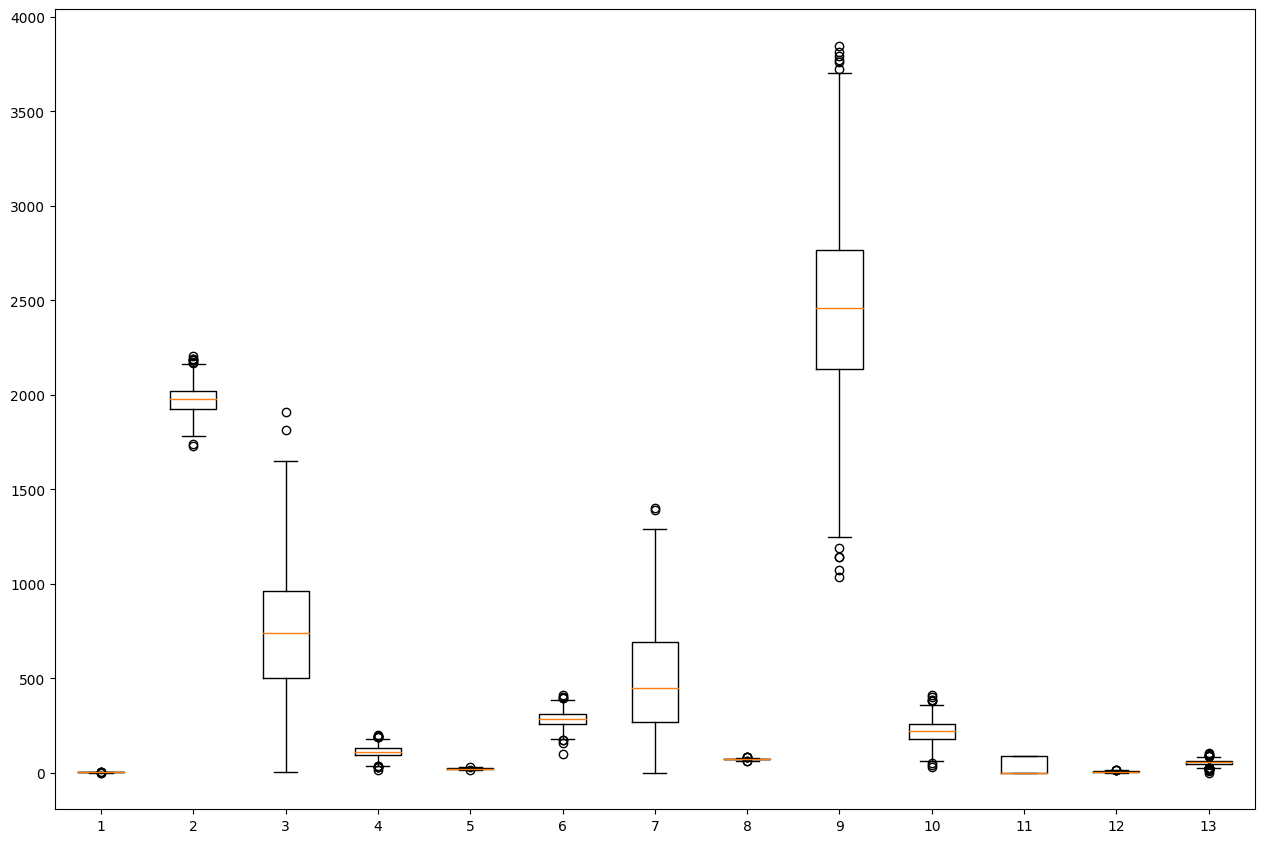

In [7]:
# Boxplot
 
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(df)
plt.show()

Определить, производить нормализацию или нет, оценим признаки путем построения гистограммы распределений по столбцам и гистограммы попарного рассеивания.
Построим гистограмму распределений по столбцам, чтоб оценить диапазоны значений, в которых лежат признаки. 

array([[<Axes: title={'center': 'Соотношение матрица-наполнитель'}>,
        <Axes: title={'center': 'Плотность, кг/м3'}>,
        <Axes: title={'center': 'модуль упругости, ГПа'}>,
        <Axes: title={'center': 'Количество отвердителя, м.%'}>],
       [<Axes: title={'center': 'Содержание эпоксидных групп,%_2'}>,
        <Axes: title={'center': 'Температура вспышки, С_2'}>,
        <Axes: title={'center': 'Поверхностная плотность, г/м2'}>,
        <Axes: title={'center': 'Модуль упругости при растяжении, ГПа'}>],
       [<Axes: title={'center': 'Прочность при растяжении, МПа'}>,
        <Axes: title={'center': 'Потребление смолы, г/м2'}>,
        <Axes: title={'center': 'Угол нашивки, град'}>,
        <Axes: title={'center': 'Шаг нашивки'}>],
       [<Axes: title={'center': 'Плотность нашивки'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

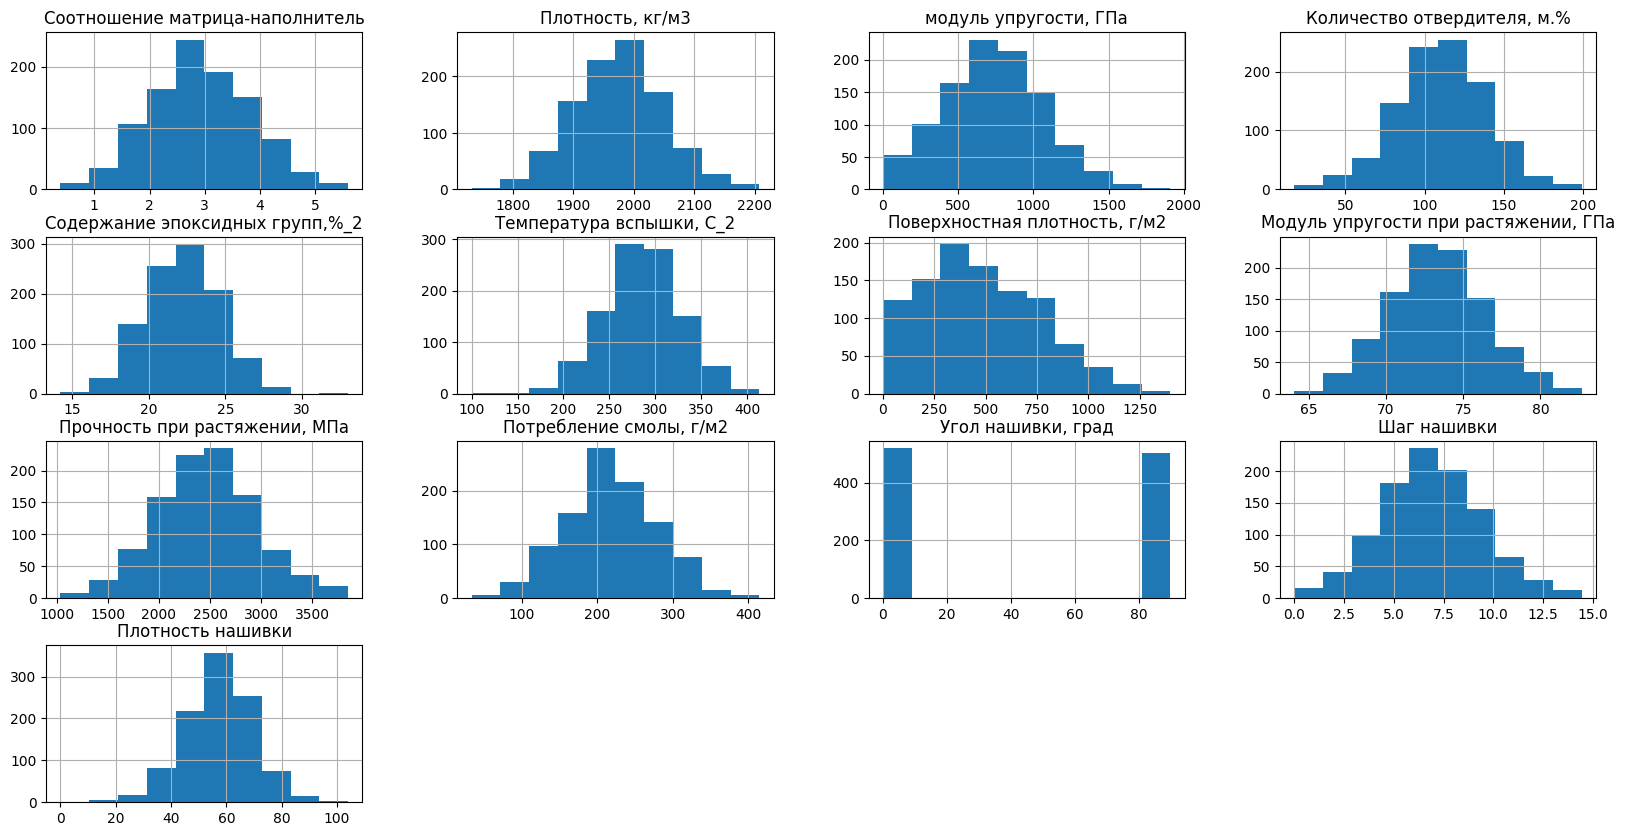

In [8]:
# Гистограммы распределения по столбцам

df.hist(figsize=(20, 10))

Признаки лежат в разных диапазонах значений. Сравнение признаков между собой будет неточным.

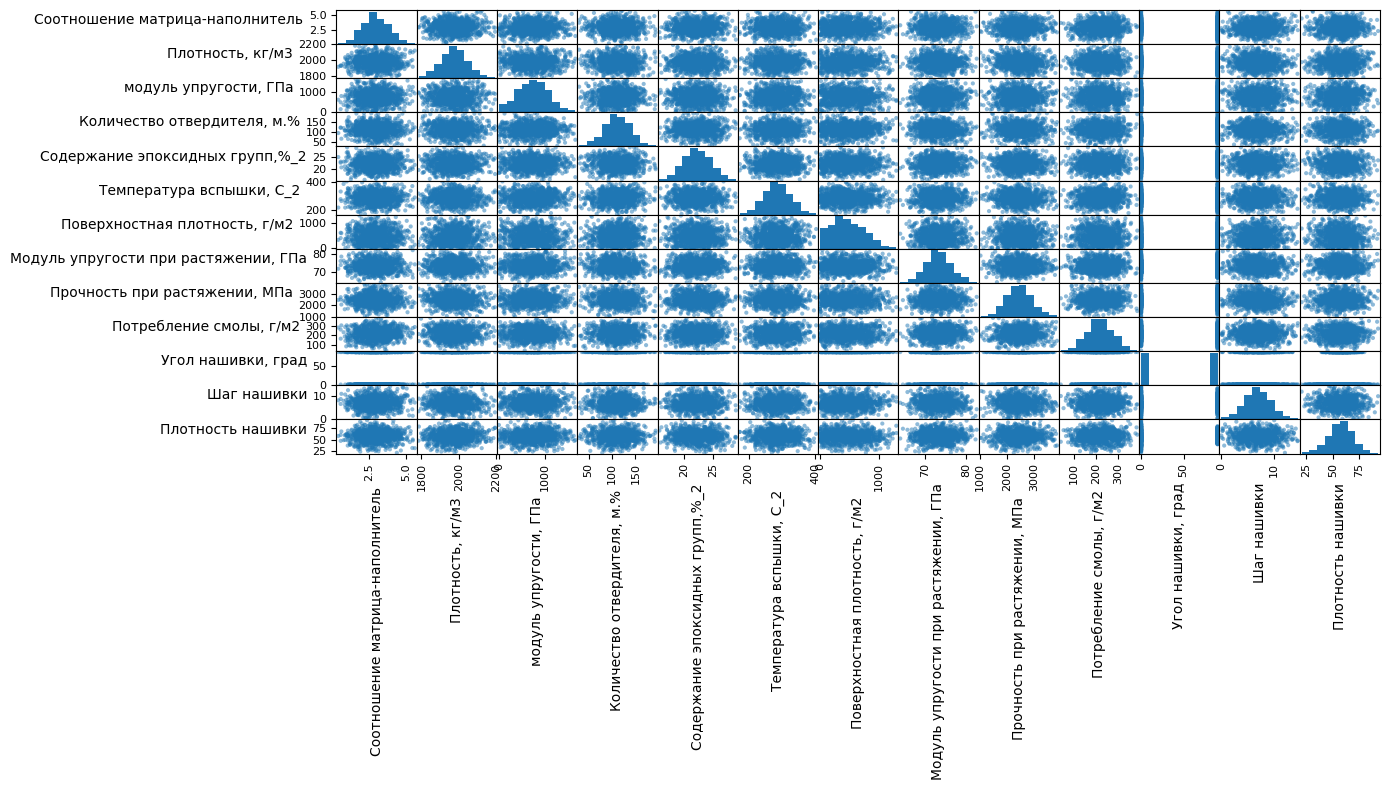

In [12]:
# Гистограммы попарного рассеивания

axes = pd.plotting.scatter_matrix(df, figsize=(14, 8))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

Удаляем выбросы. Для идентификации и удаления выбросов применим метод Z-оценки. Z-оценка показывает, сколько стандартных отклонений данного значения от среднего. Z = (X - μ) / σ 
(X – это одно необработанное значение данных, μ – среднее значение, σ – стандартное отклонение).
Определяем наблюдение как выброс, если его Z-оценка меньше -3 или больше 3.

In [9]:
# Удаление выбросов (метод Z-оценки)

z = np.abs(stats.zscore(df))
df = df[(z<3).all(axis=1)]

В результате удаления выбросов датасет уменьшился до 999 строк. Следовательно, 24 материала были идентифицированы как выбросы.

Из гистограммы попарного рассеивания видно, что основная масса большинства признаков лежит в центральной части, следовательно решение удалить выбросы было правильным. Также следует нормализовать данные по столбцам (признакам), чтоб их можно было использовать для обучения моделей машинного обучения.

In [10]:
df.shape

(999, 13)

In [11]:
df.corr()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.004226,0.044539,-0.006647,0.023488,-0.010611,-0.012322,-0.009516,0.023719,0.062625,-0.041373,0.043592,0.008647
"Плотность, кг/м3",0.004226,1.000000,-0.004100,-0.041654,-0.006227,-0.016798,0.045103,-0.015994,-0.081433,-0.016568,-0.056748,-0.047795,0.094173
"модуль упругости, ГПа",0.044539,-0.004100,1.000000,0.028704,-0.010568,0.030355,-0.004077,0.013793,0.038611,0.006803,-0.032095,-0.005988,0.068006
"Количество отвердителя, м.%",-0.006647,-0.041654,0.028704,1.000000,0.000105,0.085865,0.058037,-0.071357,-0.059566,0.021549,0.035273,-0.001002,0.012081
"Содержание эпоксидных групп,%_2",0.023488,-0.006227,-0.010568,0.000105,1.000000,-0.006679,-0.008788,0.067355,-0.025857,0.014607,0.012766,0.006837,-0.039438
"Температура вспышки, С_2",-0.010611,-0.016798,0.030355,0.085865,-0.006679,1.000000,0.028583,0.027321,-0.020762,0.051768,0.009038,0.020119,-0.007371
"Поверхностная плотность, г/м2",-0.012322,0.045103,-0.004077,0.058037,-0.008788,0.028583,1.000000,0.021924,-0.008100,0.003082,0.051710,0.043876,-0.029689
"Модуль упругости при растяжении, ГПа",-0.009516,-0.015994,0.013793,-0.071357,0.067355,0.027321,0.021924,1.000000,-0.003492,0.058045,0.023430,-0.029680,0.029278
"Прочность при растяжении, МПа",0.023719,-0.081433,0.038611,-0.059566,-0.025857,-0.020762,-0.008100,-0.003492,1.000000,0.028301,0.019031,-0.057403,0.029563
"Потребление смолы, г/м2",0.062625,-0.016568,0.006803,0.021549,0.014607,0.051768,0.003082,0.058045,0.028301,1.000000,-0.017138,0.013464,0.020144


<Axes: >

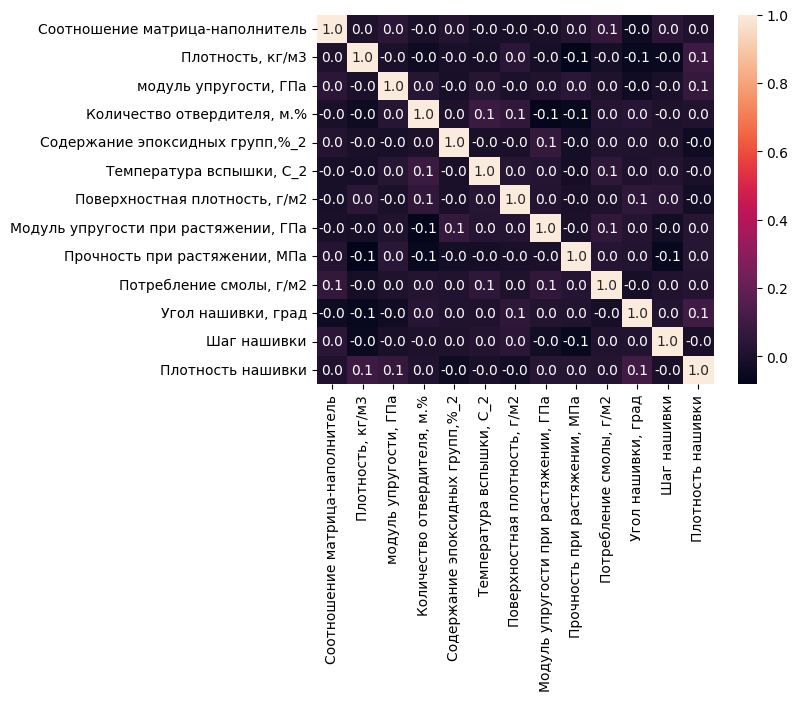

In [13]:
sns.heatmap(df.corr(), annot=True, fmt='.1f')

Разделим датасет на входные (X) и выходные (y) свойства материалов.
Произведем нормализацию входных свойств к значениям от 0 до 1 отдельно для каждого свойства. Для проверки корректности результата нормализации снова построим гистограмму распределений.

In [14]:
# X = df.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)
# y = df[['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']]

X = df.drop(['Соотношение матрица-наполнитель'], axis=1)
y = df[['Соотношение матрица-наполнитель']]

In [15]:
X.shape, y.shape

((999, 12), (999, 1))

In [ ]:
# сохранение мин-макс значений входных данных

# X.min().to_pickle('X_min_1.pkl')
# X.max().to_pickle('X_max_1.pkl')
# X.min().to_pickle('X_min_2.pkl')
# X.max().to_pickle('X_max_2.pkl')

Разные входные признаки лежат в разных диапазонах значений. Из-за этого их невозможно сравнивать между собой. Также ненормированные значения признаков способны быстро свести на нет обучение многих моделей алгоритмов машинного обучения, поскольку веса алгоритмов станут нулевыми либо бесконечными. Чтобы избежать вышеописанных проблем, следует произвести нормализацию входных признаков.

Причем нормализация целевых переменных необязательна и не будет произведена, чтоб минимизировать обработку выходных данных моделей.

In [ ]:
# нормализация

X = (X - X.min()) / (X.max() - X.min())

Для проверки корректности нормализации построим гистограмму распределений.

array([[<Axes: title={'center': 'Плотность, кг/м3'}>,
        <Axes: title={'center': 'модуль упругости, ГПа'}>,
        <Axes: title={'center': 'Количество отвердителя, м.%'}>],
       [<Axes: title={'center': 'Содержание эпоксидных групп,%_2'}>,
        <Axes: title={'center': 'Температура вспышки, С_2'}>,
        <Axes: title={'center': 'Поверхностная плотность, г/м2'}>],
       [<Axes: title={'center': 'Модуль упругости при растяжении, ГПа'}>,
        <Axes: title={'center': 'Прочность при растяжении, МПа'}>,
        <Axes: title={'center': 'Потребление смолы, г/м2'}>],
       [<Axes: title={'center': 'Угол нашивки, град'}>,
        <Axes: title={'center': 'Шаг нашивки'}>,
        <Axes: title={'center': 'Плотность нашивки'}>]], dtype=object)

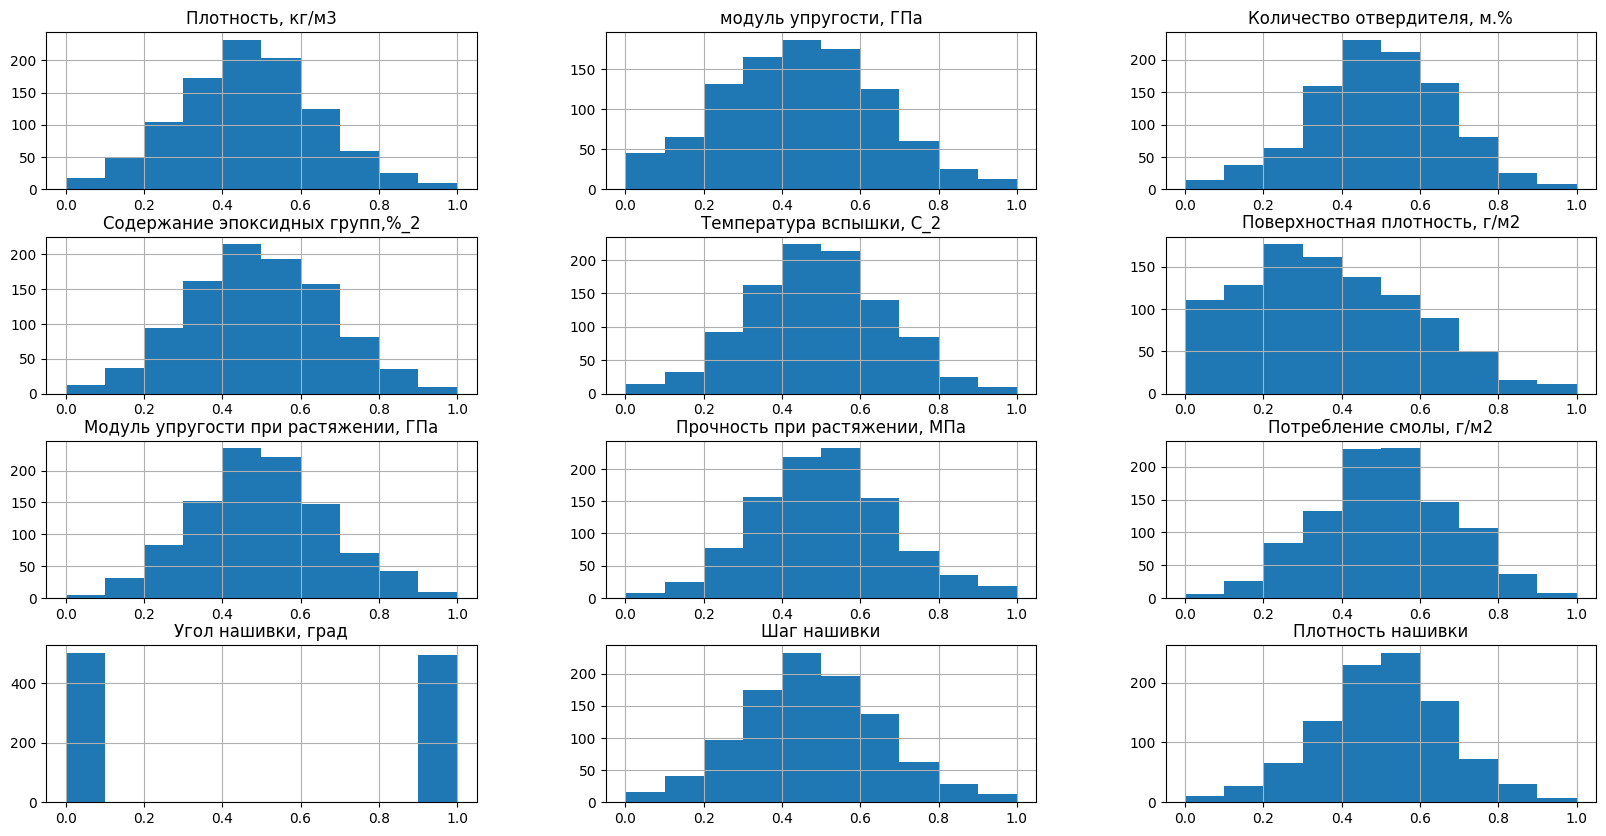

In [ ]:
X.hist(figsize=(20, 10))

Теперь все входные признаки лежат в диапазоне от 0 до 1, следовательно нормализация произведена корректно.


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Подбор гиперпараметров

RandomForest чуть быстрее.

In [ ]:
parameters = {
    'n_estimators': [10, 100, 1000],
    'max_features': ['sqrt', None],
    'max_depth': [10, 50, 100, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}

clf = GridSearchCV(RandomForestRegressor(random_state=42), parameters).fit(X_train, y_train)
print(clf.best_params_)
clf.score(X_test, y_test)

# {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 1000}
# -0.007779379837577205

{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 1000}


-0.007779379837577205

 k-NN быстрый. 

In [ ]:
parameters = {
    'n_neighbors': [2, 5, 10, 20, 50, 100],
    'weights': ['uniform', 'distance'],
}

clf = GridSearchCV(KNeighborsRegressor(), parameters).fit(X_train, y_train)
print(clf.best_params_)
clf.score(X_test, y_test)

# {'n_neighbors': 100, 'weights': 'uniform'}
# -0.010984286735654991

{'n_neighbors': 100, 'weights': 'uniform'}


-0.010984286735654991

DT быстрый. 

In [ ]:
parameters = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_features': ['sqrt', None],
    'max_depth': [10, 50, 100, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

clf = GridSearchCV(DecisionTreeRegressor(random_state=42), parameters).fit(X_train, y_train)
print(clf.best_params_)
clf.score(X_test, y_test)

# {'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
# -0.35155303738192045

{'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}


-0.35155303738192045

Перцептрон долгий, но точный! 

In [ ]:
parameters = {
    'hidden_layer_sizes': [(100,), (500,), (1000,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'batch_size': [50, 100, 200],
    'learning_rate_init': [0.01, 0.001, 0.0001],
}

clf = GridSearchCV(MLPRegressor(max_iter=1000, random_state=42), parameters).fit(X_train, y_train)
print(clf.best_params_)
clf.score(X_test, y_test)

# {'activation': 'tanh', 'batch_size': 100, 'hidden_layer_sizes': (1000,), 'learning_rate_init': 0.001}
# -0.006368987106971313

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron

{'activation': 'tanh', 'batch_size': 100, 'hidden_layer_sizes': (1000,), 'learning_rate_init': 0.001}


-0.006368987106971313

# Обучение

In [18]:
regs = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(bootstrap=True, max_depth=10, max_features='sqrt', min_samples_leaf=4, min_samples_split=10, n_estimators=1000, random_state=42),
    'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=100, weights='uniform'),
    'DecisionTreeRegressor': DecisionTreeRegressor(criterion='squared_error', max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=10, random_state=42),
    'MLPRegressor': MLPRegressor(max_iter=1000, activation='tanh', batch_size=100, hidden_layer_sizes=(1000,), learning_rate_init=0.001, random_state=42),
}

In [19]:
for k, v in regs.items():
  start_time = time.time()
  regs[k].fit(X_train, y_train)
  end_time = time.time()
  print(f'{k}:\t{end_time - start_time}')

LinearRegression:	0.05026125907897949


<ipython-input-19-bb57543d4a22>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regs[k].fit(X_train, y_train)


RandomForestRegressor:	3.0227503776550293
KNeighborsRegressor:	0.004189968109130859
DecisionTreeRegressor:	0.005354881286621094


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor:	1.0923447608947754


Из-за влияния случайных факторов, время может отличаться при повторном выполнении обучения.

# Тестирование

In [ ]:
def getAbsoluteError(X, y, reg):
  pred = reg.predict(X)
  return np.mean(np.absolute(np.array(y) - np.array(pred)))


for k, v in regs.items():
  train_score = regs[k].score(X_train, y_train)
  test_score = regs[k].score(X_test, y_test)
  train_error = getAbsoluteError(X_train, y_train, v)
  test_error = getAbsoluteError(X_test, y_test, v)
  print(f'===== {k} =====\ntrain_score:\t{train_score}\ntest_score:\t{test_score}\ntrain_error:\t{train_error}\ntest_error:\t{test_error}\n')

===== LinearRegression =====
train_score:	0.012159455421125953
test_score:	-0.004910127723273039
train_error:	0.7324642127997907
test_error:	0.6925133721991997

===== RandomForestRegressor =====
train_score:	0.433349590871707
test_score:	-0.006075419881322652
train_error:	0.7643374401335187
test_error:	0.6994746788941003

===== KNeighborsRegressor =====
train_score:	0.007504661930106793
test_score:	0.021122893801380993
train_error:	0.7345688128917768
test_error:	0.6867571893791501

===== DecisionTreeRegressor =====
train_score:	0.24470776250297455
test_score:	-0.3458027336352276
train_error:	0.8123225203933029
test_error:	0.7817883747797255

===== MLPRegressor =====
train_score:	0.007157491547237327
test_score:	-0.0010531448721526893
train_error:	0.7427420836954904
test_error:	0.6921753921900984



Наилучшие значения коэффициента детерминации и средней абсолютной ошибки на тестовой выборке показывает метод многослойного перцептрона (нейронная сеть). Следовательно, именно нейронная сеть (многослойный перцептрон) будет использоваться для разработки системы прогнозирования конечных свойств новых композиционных материалов.

In [ ]:
# сохранение обученных моделей на диск

# pickle.dump(regs['MLPRegressor'], open('mlp_model_1.sav', 'wb'))
# pickle.dump(regs['MLPRegressor'], open('mlp_model_2.sav', 'wb'))

# Система прогнозирования конечных свойств композиционных материалов

In [ ]:
import pickle
import numpy as np
import pandas as pd 
from sklearn.neural_network import MLPRegressor

from google.colab import files


class SystemCompositeMaterials():

  def __init__(self):
    print('Выберите excel-файл с данными:')
    self.df = pd.read_excel(list(files.upload().keys())[0], index_col=0, header=0)
    self.task_num = 1
    self.X = self.df.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)
    self.reg = pickle.load(open('mlp_model_1.sav', 'rb'))
    self.input_task_num()

  def input_task_num(self):
    print(f'\n===== Задача 1 =====\nОпределить значения:\n- Модуль упругости при растяжении, ГПа\n- Прочность при растяжении, МПа\n===== Задача 2 =====\nРекомендовать:\n- Соотношение матрица-наполнитель\n')
    try:
      if int(input('Введите номер задачи (1 или 2): ')) == 2:
        self.task_num = 2
        self.X = self.df.drop(['Соотношение матрица-наполнитель'], axis=1)
        self.reg = pickle.load(open('mlp_model_2.sav', 'rb'))
    except:
      pass
    self.normalize()

  def normalize(self):
    X_min = pd.read_pickle(f'X_min_{self.task_num}.pkl')
    X_max = pd.read_pickle(f'X_max_{self.task_num}.pkl')
    self.X = (self.X - X_min) / (X_max - X_min)
    self.predict()

  def predict(self):
    predicts = self.reg.predict(self.X)
    print('\nРезультат прогнозирования:')
    if self.task_num == 1:
      pd.DataFrame(predicts, columns=['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']).to_excel(f'predicts_for_task_{self.task_num}.xlsx', )
      print('index', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа', sep='\t')
      for i in range(predicts.shape[0]):
        print(f'{i}\t{predicts[i][0]}\t\t\t{predicts[i][1]}')
    else:
      pd.DataFrame(predicts, columns=['Соотношение матрица-наполнитель']).to_excel(f'predicts_for_task_{self.task_num}.xlsx')
      print('index', 'Соотношение матрица-наполнитель', sep='\t')
      for i in range(predicts.shape[0]):
        print(i, predicts[i], sep='\t')


SystemCompositeMaterials()

Выберите excel-файл с данными:


Saving input_ds.xlsx to input_ds (2).xlsx

===== Задача 1 =====
Определить значения:
- Модуль упругости при растяжении, ГПа
- Прочность при растяжении, МПа
===== Задача 2 =====
Рекомендовать:
- Соотношение матрица-наполнитель

Введите номер задачи (1 или 2): 1

Результат прогнозирования:
index	Модуль упругости при растяжении, ГПа	Прочность при растяжении, МПа
0	73.00661177977082			2457.8762459222166
1	73.41220346950988			2471.4586911050055
2	73.49160901631676			2474.1057135410974
3	73.44755937283824			2472.637355290602
4	73.46964121930162			2473.3723775273875
5	73.46678790362974			2473.2773214626704
6	73.45944325246313			2473.032320748736
7	73.3827237191066			2470.481184453936
8	73.47467299870132			2473.5408161248743
9	73.52285060900687			2475.14004654069
10	73.5219055242657			2475.108666767132
